In [1]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np


2024-11-22 09:40:58.662673: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 09:40:58.670754: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 09:40:58.782365: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 09:40:58.838393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 09:40:58.928888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
import pandas as pd   

train = pd.read_csv('project/train/_annotations.csv')
test = pd.read_csv('project/test/_annotations.csv')
valid = pd.read_csv('project/valid/_annotations.csv')

In [3]:
train.shape

(770, 8)

In [4]:
train['class'].unique()


array(['syringe n glass', '0'], dtype=object)

In [5]:
train = train.replace(to_replace='syringe n glass',
           value=1)
train = train.replace(to_replace='0',
           value=0)
train['class'].unique()

/tmp/ipykernel_3250/2967954676.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace(to_replace='0',


array([1, 0])

In [6]:
test = test.replace(to_replace='syringe n glass',
           value=1)
test = test.replace(to_replace='0',
           value=0)
test['class'].unique()

/tmp/ipykernel_3250/2523532440.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace(to_replace='0',


array([0, 1])

In [7]:
valid = valid.replace(to_replace='syringe n glass',
           value=1)
valid = valid.replace(to_replace='0',
           value=0)
valid['class'].unique()

/tmp/ipykernel_3250/877475983.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valid = valid.replace(to_replace='0',


array([0, 1])

In [8]:
train_folder = 'project/train'
test_folder = 'project/test'
valid_folder = 'project/valid'

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data generator
train_gen = ImageDataGenerator(
rotation_range=45,
rescale=1./255,
horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)


In [10]:
# Convert the class column to strings
train['class'] = train['class'].astype(str)
test['class'] = test['class'].astype(str)
valid['class'] = valid['class'].astype(str)

# Now create the data generators
train_data = train_gen.flow_from_dataframe(dataframe=train, 
                                           directory=train_folder, 
                                           x_col="filename", 
                                           y_col='class', 
                                           seed=42,
                                           batch_size=10, 
                                           shuffle=True, 
                                           class_mode="binary",  # Use binary if labels are 0 and 1
                                           target_size=(250, 250))

test_data = test_gen.flow_from_dataframe(dataframe=test, 
                                         directory=test_folder, 
                                         x_col="filename", 
                                         y_col='class', 
                                         batch_size=10, 
                                         shuffle=True, 
                                         class_mode="binary", 
                                         target_size=(250, 250))

valid_data = test_gen.flow_from_dataframe(dataframe=valid, 
                                          directory=valid_folder, 
                                          x_col="filename", 
                                          y_col='class', 
                                          batch_size=10, 
                                          shuffle=True, 
                                          class_mode="binary", 
                                          target_size=(250, 250))


Found 770 validated image filenames belonging to 2 classes.
Found 94 validated image filenames belonging to 2 classes.
Found 258 validated image filenames belonging to 2 classes.


In [11]:
train_imgs, train_lbl = next(iter(train_data))
test_imgs, test_lbl = next(iter(test_data))
valid_imgs, valid_lbl = next(iter(valid_data))

1.0


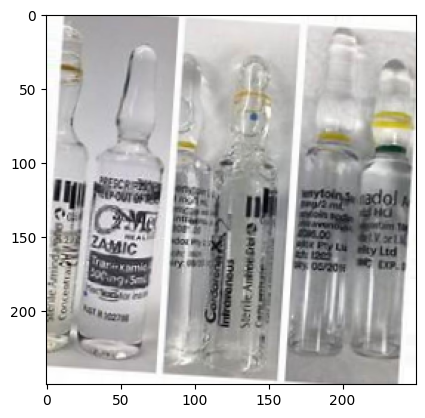

In [12]:
import pylab as plt
plt.imshow(train_imgs[2])
print(train_lbl[2])

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(250, 250, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layers
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(2, activation='softmax'))

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 250, 250, 50)   │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 250, 250, 75)   │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 125, 125, 75)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 125, 125, 75)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 125)  │        84,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 62, 62, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 480500)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │   240,250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,495,977 (917.42 MB)

 Trainable params: 240,495,977 (917.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=10
# Update your checkpoint to use 'val_accuracy'
checkpoint = ModelCheckpoint("clinicalwaste.keras", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

# Update early stopping to monitor 'val_accuracy' with mode='max'
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max')

# Ensure your steps_per_epoch and validation_steps are set appropriately
epoch = len(train) // batch_size  # Adjust based on your data
validation_steps = len(test) // batch_size   # Adjust based on your data


In [ ]:
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result = model.fit(
    train_data,
    steps_per_epoch=epoch,
    epochs=5,
    validation_data=valid_data,
    validation_steps=validation_steps,
    callbacks=[checkpoint, early]
)

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4732 - loss: 0.8297
Epoch 1: val_accuracy improved from -inf to 0.54444, saving model to clinicalwaste.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.4735 - loss: 0.8293 - val_accuracy: 0.5444 - val_loss: 0.6963
Epoch 2/5


2024-11-22 09:52:38.310576: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.54444
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5222 - val_loss: 0.7015
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5312 - loss: 0.7229
Epoch 3: val_accuracy improved from 0.54444 to 0.56410, saving model to clinicalwaste.keras


2024-11-22 09:56:50.797881: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.5309 - loss: 0.7229 - val_accuracy: 0.5641 - val_loss: 0.6923
Epoch 4/5

Epoch 4: val_accuracy did not improve from 0.56410
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5444 - val_loss: 0.6929
Epoch 5/5
57/77 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.4730 - loss: 0.7208

In [106]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3898 - loss: 0.6981
Test accuracy: 44.68%


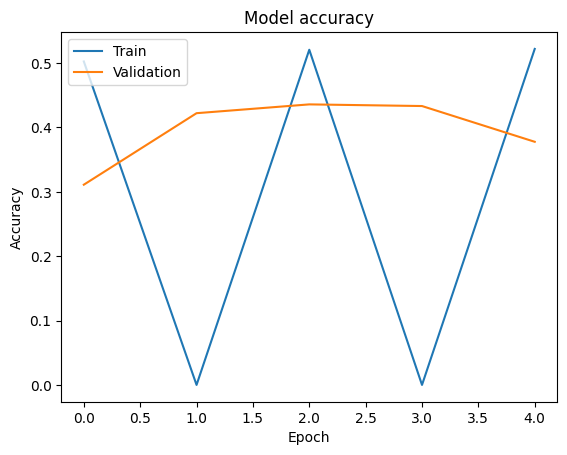

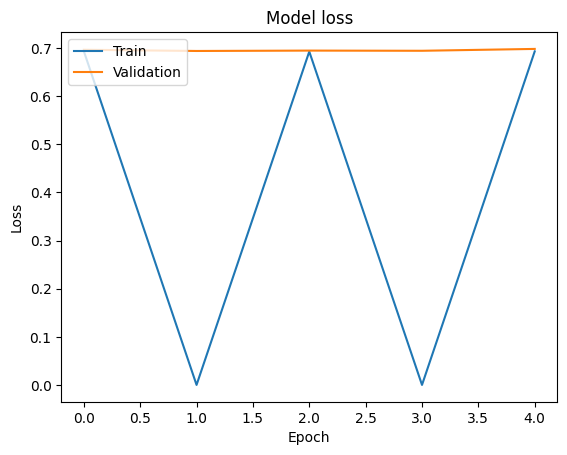

In [107]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: 1
Actual label: 1.0


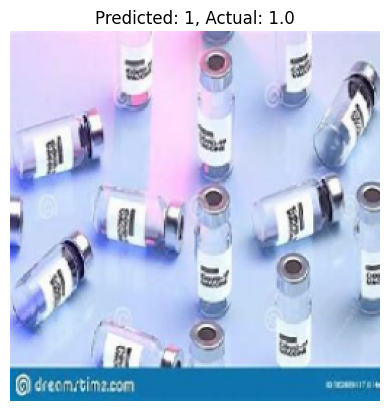

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

index=2

image = test_imgs[index]


image_resized = cv2.resize(image, (255, 255))  

image_normalized = image_resized / 255.0  
image_expanded = np.expand_dims(image_normalized, axis=0)


predictions = model.predict(image_expanded)  #
predicted_label = (predictions > 0.5).astype(int)

actual_label=test_lbl[index]

print(f"Predicted label: {predicted_label[0][0]}") 
print(f"Actual label: {actual_label}")

plt.imshow(image_resized)
plt.title(f"Predicted: {predicted_label[0][0]}, Actual: {actual_label}")
plt.axis('off')  # Hide axes
plt.show()
